# Cardiovascular Disease Prediction (45m)

## P/S: Please do not delete your output/result when you submit your python file

The World Health Organization (WHO) estimates that 17.9 million people die every year because of cardiovascular diseases (CVDs).

There are multiple risk factors that could contribute to CVD in an individual such as unhealthy diet, lack of physical activity or mental illnesses. Being able to identify these risk factors in individuals early on could help prevent a lot of premature deaths.

In this assignment, we will build a Logistic Regression and K-Neareast Neighbor classifier to predict the likelihood of a patient having a cardiovascular disease in the future.

In [376]:
# configure CSS settings for colab
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [377]:
!pip install -qq pandas numpy matplotlib seaborn scikit-learn

In [378]:
import numpy as np

import pandas as pd
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Dataset Explaination

Eeach patient has the following information collected about them:


1. `Age`: age of the patient [years]
2. `Sex`: sex of the patient [M: Male, F: Female]
3. `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. `RestingBP`: resting blood pressure [mm Hg]
5. `Cholesterol`: serum cholesterol [mm/dl]
6. `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
9. `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
10. `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
11. `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. `HeartDisease`: output class [1: heart disease, 0: Normal]

## Load in the dataset and exploration

Q1: Load dataset (0.5m)

In [379]:
df = pd.read_csv("./sample_data/heart_disease_prediction.csv")

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Q2: Print out the first 5 rows of the dataset (0.5m)

In [380]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Q3: Please find the datatype for each column. Please print out the result. (1m)

In [381]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We can convert the `object` types to `string` types

In [382]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

Q4: How many features are categorical? How many features are numerical? (1m)

Ans:

| Column          | Type | Description |
|-----------------|-----------|-------------|
| Age             | int64     | Age of the patient (years) |
| Sex             | object    | Sex of the patient (M: Male, F: Female) |
| ChestPainType   | object    | Chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic) |
| RestingBP       | int64     | Resting blood pressure (mm Hg) |
| Cholesterol     | int64     | Serum cholesterol (mm/dl) |
| FastingBS       | int64     | Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise) |
| RestingECG      | object    | Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria) |
| MaxHR           | int64     | Maximum heart rate achieved (Numeric value between 60 and 202) |
| ExerciseAngina  | object    | Exercise-induced angina (Y: Yes, N: No) |
| Oldpeak         | float64   | Oldpeak = ST (Numeric value measured in depression) |
| ST_Slope        | object    | The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping) |
| HeartDisease    | int64     | Output class (1: heart disease, 0: Normal) |



Q5: Could you print out some basic statistical details like percentile, mean, std, etc. for all the numerical variables? (1m)


In [383]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Q6: What do you observe from the statistical details above? Please include at least 2 points. (2m)

Ans:
1. `FastingBS` and `HeartDisease` are boolean values represented as numerical, since the min and max are 0 and 1.
2. `Oldpeak` has a negative value, which seem to be an outlier, since ST values are generally positive. The following graph shows the relationship and index, with some stray values below 0.

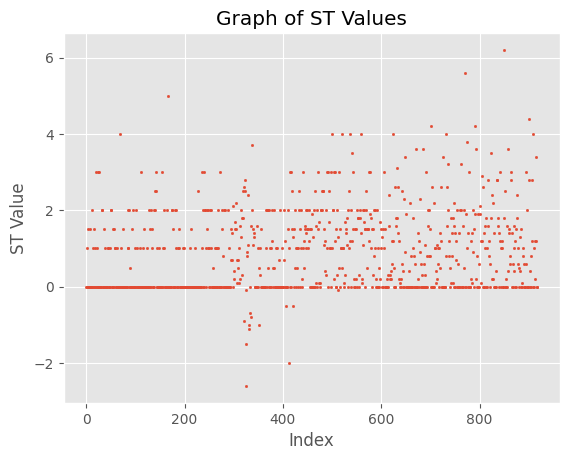

In [384]:
import matplotlib.pyplot as plt

# Plotting the values in the "ST" column
plt.scatter(range(len(df['Oldpeak'])), df['Oldpeak'], marker='.', s=10)
plt.xlabel('Index')
plt.ylabel('ST Value')
plt.title('Graph of ST Values')
plt.show()

Q7: Could you print out some basic statistical details for all the categorical variable? (1m)

In [385]:
# Selecting only the categorical columns
categorical_features = df.select_dtypes(include='string')

# Print statistical details for each categorical variable
for feature in categorical_features:
    print(f"Statistical details for {feature}:")
    print("----------------------------")

    # Count of each category
    counts = df[feature].value_counts()
    print("Value Counts:")
    print(counts)

    # Proportion or percentage of each category
    proportions = df[feature].value_counts(normalize=True)
    print("Proportions:")
    print(proportions)

    print("\n")

Statistical details for Sex:
----------------------------
Value Counts:
M    725
F    193
Name: Sex, dtype: Int64
Proportions:
M    0.78976
F    0.21024
Name: Sex, dtype: Float64


Statistical details for ChestPainType:
----------------------------
Value Counts:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
Proportions:
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: Float64


Statistical details for RestingECG:
----------------------------
Value Counts:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
Proportions:
Normal    0.601307
LVH       0.204793
ST          0.1939
Name: RestingECG, dtype: Float64


Statistical details for ExerciseAngina:
----------------------------
Value Counts:
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
Proportions:
N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: Float64


Statistical details for ST_Slope:
----------------------------
Value Co

Q8: Is there any numerical that should belong to categorical and categorical belong to numerical? If yes, please include here. (1m)

Ans:

`FastingBS` and `HeartDisease` could be converted into categorical values for training later, since there are only two distinct values.

In [386]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


Q9: Is there any missing data? (1m)

Ans: No, there isn't.

In [387]:
# Please type your code here
missing_data = df.isnull().sum()

print(missing_data)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Q10: Please plot out all the bar graph for all the categorical dataset. (2m)

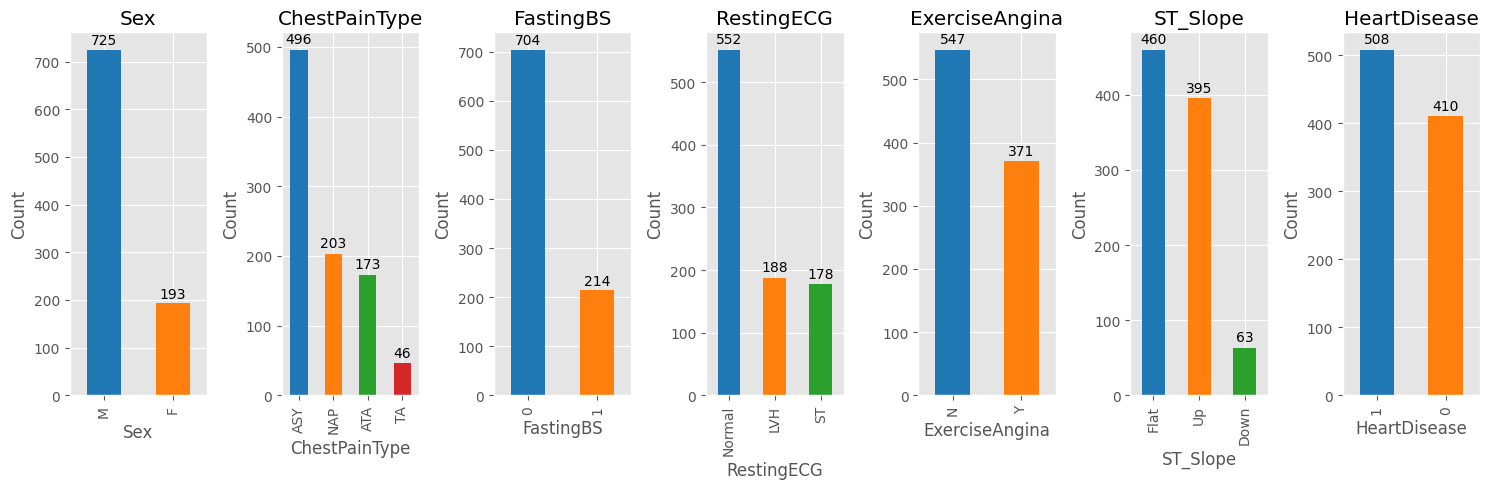

In [388]:
import numpy as np

num_rows = 1
num_cols = len(categorical_features)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, column in enumerate(categorical_features):
    counts = df[column].value_counts()

    colormap = plt.colormaps['tab10']
    colors = colormap(np.arange(len(counts)))

    ax = axes[i]
    counts.plot(kind='bar', color=colors, ax=ax)

    for j, count in enumerate(counts):
        ax.text(j, count+5, str(count), ha='center', va='bottom')

    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

Q11: Is there any finding that you can spot from the bar graph above? Please include at least 2 points (2m)

Ans:

1. There is a larger proportion of `Males` compared to `Females`.

2. There is a predominance of `ASY` Chest Pain Type as compared to the rest. The sum of `NAP`, `ATA` and `TA` cannot even match the total number of `ASY` types.


Q12: Improve the figure above by grouping them with `HeartDisease`. (2m)

We can also chart the `mean` of each variable by grouping them by `HeartDisease`

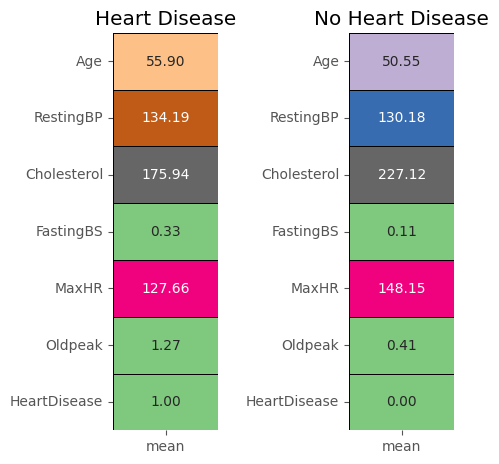

In [389]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = 'Accent',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = 'Accent',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

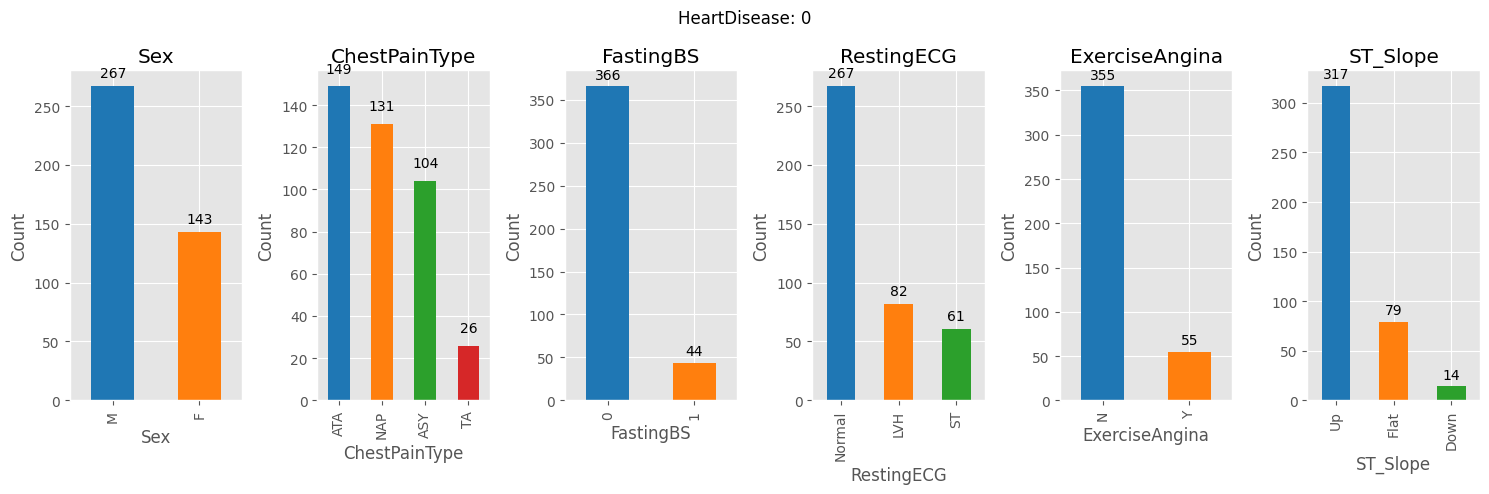

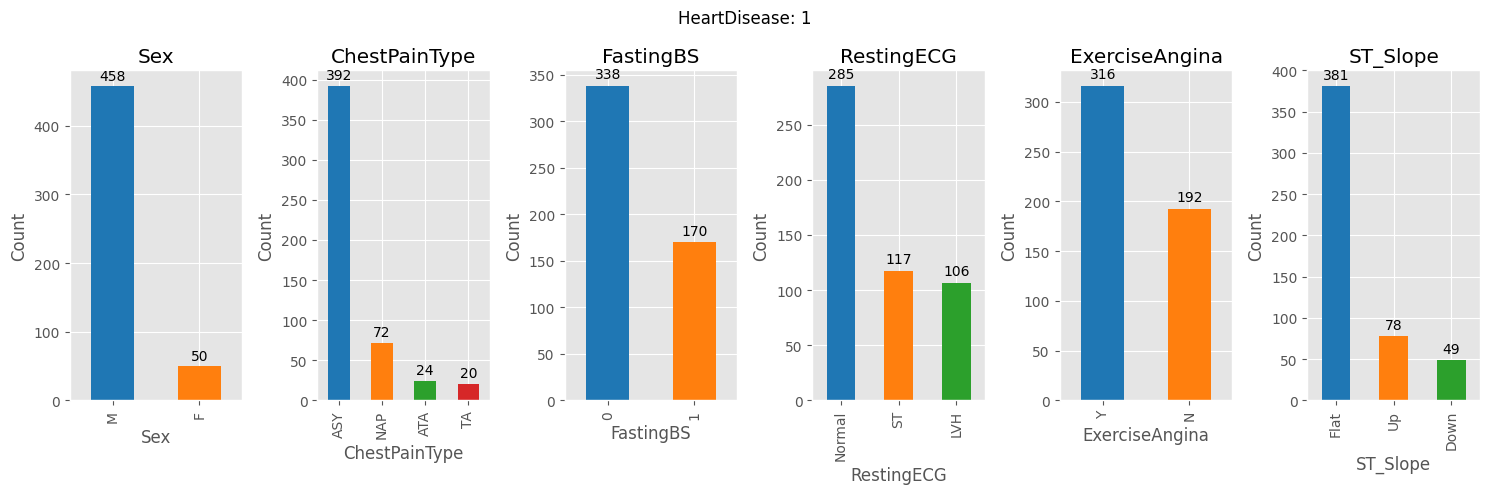

In [390]:
grouped_data = df.groupby('HeartDisease')

categorical_columns = list(filter(lambda feat: feat != 'HeartDisease', categorical_features))

for group_name, group_df in grouped_data:
    fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

    for i, column in enumerate(categorical_columns):
        counts = group_df[column].value_counts()

        colormap = plt.colormaps['tab10']
        colors = colormap(np.arange(len(counts)))

        ax = axes[i]
        counts.plot(kind='bar', color=colors, ax=ax)

        for j, count in enumerate(counts):
            ax.text(j, count+5, str(count), ha='center', va='bottom')

        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

    fig.suptitle(f'HeartDisease: {group_name}')

    plt.tight_layout()

    plt.show()

Q13: Is there any finding that you can observe from the bar graph with `HeartDisease` grouping above? Please include at least 2 points (2m)

Ans:

1. There is an overwhelming `Male` representation having Heart Disease than `Female` representation. It is also fairly true even for the population without Heart Disease. This has the potential to skew our data.

2. For `ChestPainType`, it is very clear that the `ASY` type significantly increases with Heart Disease than for those without Heart Disease.

## Data Cleaning


Q14: Please clean the data and include your explanation. (3m)

Hints: Just look at the missing data/NaN/zero data at the moment.

Ans:


In [391]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


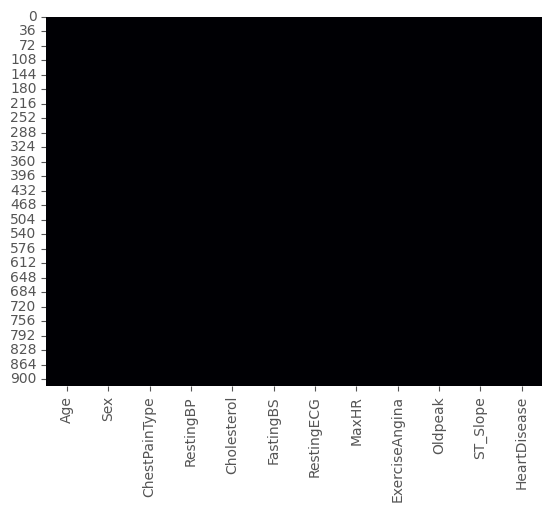

In [392]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

There are no null data and duplicates in the dataset. We are clear to move ahead with feature selection.

## Feature Selection



Q15: Find the correlation of all the variable. Please plot the heatmap graph for the correlation value. (2m)



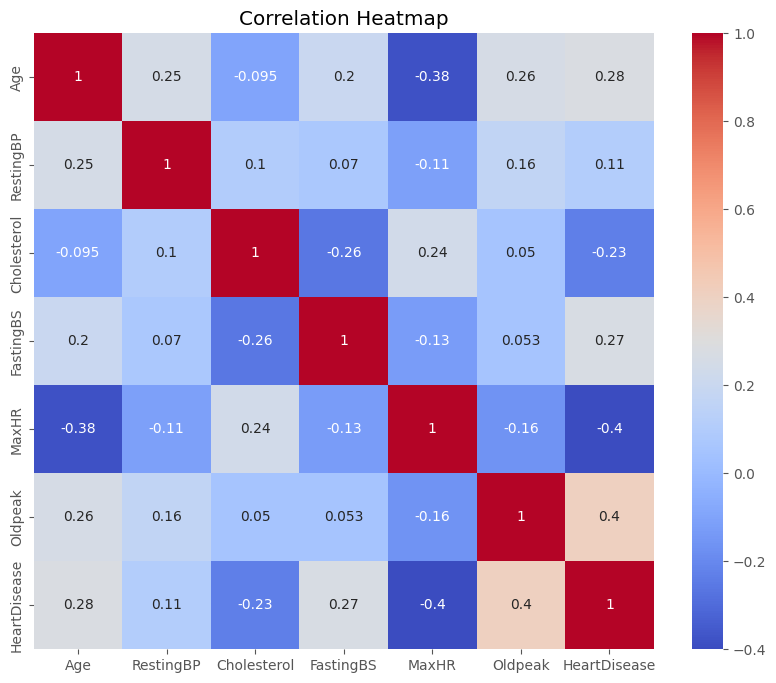

In [393]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Q16: Perform feature selection. Please provide your justification. (1m)

We will first encode the categorical variables in order to compute feature correlation.

In [394]:
le = LabelEncoder()
df_encoded = df.copy(deep = True)

df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])
df_encoded['ChestPainType'] = le.fit_transform(df_encoded['ChestPainType'])
df_encoded['RestingECG'] = le.fit_transform(df_encoded['RestingECG'])
df_encoded['ExerciseAngina'] = le.fit_transform(df_encoded['ExerciseAngina'])
df_encoded['ST_Slope'] = le.fit_transform(df_encoded['ST_Slope'])

df_encoded.head().T

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,54.0
Sex,1.0,0.0,1.0,0.0,1.0
ChestPainType,1.0,2.0,1.0,0.0,2.0
RestingBP,140.0,160.0,130.0,138.0,150.0
Cholesterol,289.0,180.0,283.0,214.0,195.0
FastingBS,0.0,0.0,0.0,0.0,0.0
RestingECG,1.0,1.0,2.0,1.0,1.0
MaxHR,172.0,156.0,98.0,108.0,122.0
ExerciseAngina,0.0,0.0,0.0,1.0,0.0
Oldpeak,0.0,1.0,0.0,1.5,0.0


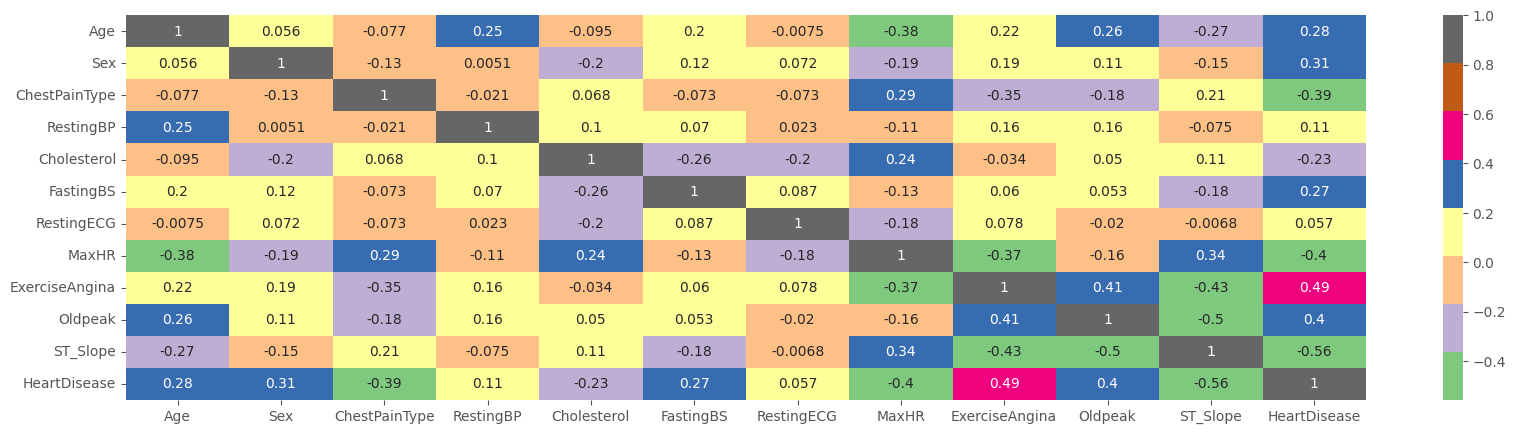

In [395]:
plt.figure(figsize = (20,5))
sns.heatmap(df_encoded.corr(),cmap = 'Accent',annot = True);

Since there are too many features, we will check the correlation only with respect to `HeartDisease`.

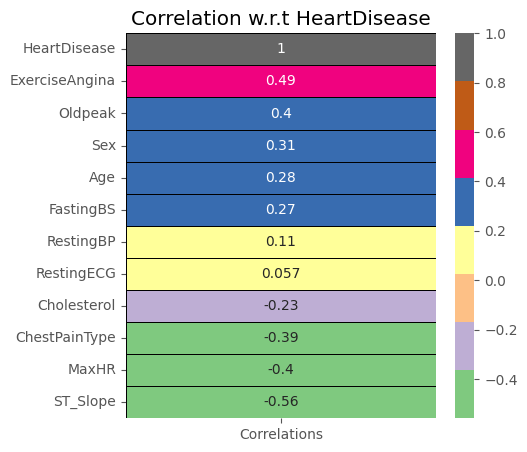

In [396]:
corr = df_encoded.corrwith(df_encoded['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'Accent',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

Except for `RestingBP` and `RestingECG`, which has relatively neutral values (i.e. no correlation), every other feature displays either a positive or negative relationship with `HeartDisease`, with `ST_Slope` being the most negatively correlated, and `ExerciseAngina` being the most positively correlated.

### Feature Selection for Categorical Features

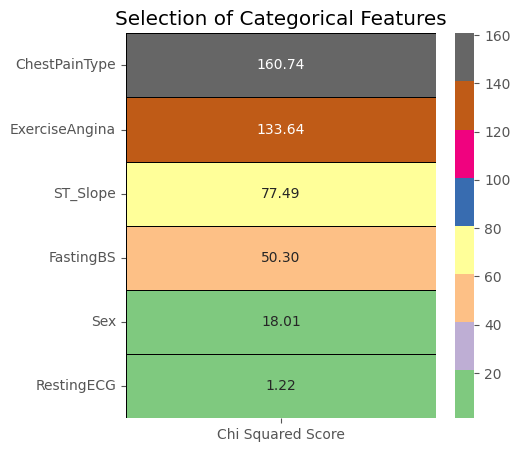

In [397]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df_encoded.loc[:,categorical_features[:-1]]
target = df_encoded.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'Accent',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Except `RestingECG`, all the remaining categorical features are pretty important for predicting heart diseases.


### Feature Selection for Numerical Features

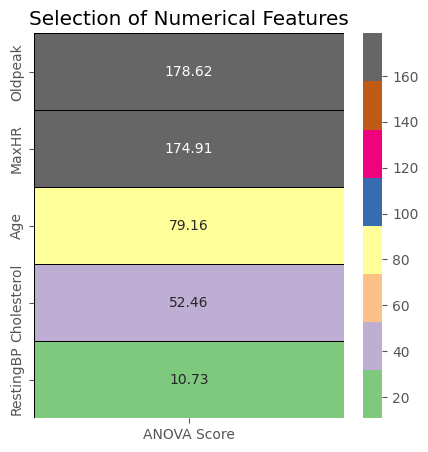

In [398]:
from sklearn.feature_selection import f_classif

features = df_encoded.loc[:,numerical_features]
target = df_encoded.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'Accent',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

We will leave out `RestingBP` from the modeling part and take the remaining features.

In gist, we will select all features, except `RestingBP` and `RestingECG`.

## Building a Classifier with One Feature

In [399]:
from sklearn import metrics as mt, model_selection as ms

Q17: Split the data into training and test using ratio 80:20. (2m)

In [400]:
features = df_encoded[df_encoded.columns.drop(['HeartDisease','RestingBP','RestingECG'])]
target = df_encoded['HeartDisease']
enc_x_train, enc_x_test, enc_y_train, enc_y_test = ms.train_test_split(features, target, test_size = 0.20, random_state = 2)

We will define the methods for model training and evaluation, with the performance scoring.

In [401]:
def model(classifier, x_train, x_test, y_train, y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = ms.RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

    print("Accuracy : ",'{0:.2%}'.format(mt.accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(ms.cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(mt.roc_auc_score(y_test,prediction)))

    fpr, tpr, thresholds = mt.roc_curve(y_test, prediction)
    roc_auc = mt.auc(fpr, tpr)
    display = mt.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Estimator')
    display.plot()
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier, x_test, y_test):

    # Confusion Matrix
    cm = mt.confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Accent',fmt ='')

    # Classification Report
    print(mt.classification_report(y_test,classifier.predict(x_test)))

Q18: From the features that you selected in previous step. Let's run a logistic regression model and calculate the accuracy for each of the feature. (2m)

In [402]:
selected_features = df_encoded[df_encoded.columns.drop(['HeartDisease','RestingBP','RestingECG'])]

In [403]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

accuracy_scores = {}
for i, feature in enumerate(selected_features):

    logreg.fit(enc_x_train[[feature]], enc_y_train)

    y_pred = logreg.predict(enc_x_test[[feature]])
    accuracy_scores[feature] = mt.accuracy_score(enc_y_test.reset_index(drop=True), y_pred)

ranked_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

for rank, (feature, accuracy) in enumerate(ranked_accuracy_scores, start=1):
    print(f"Rank {rank} - Accuracy for {feature}: {round(accuracy * 100,2)}%")

Rank 1 - Accuracy for ST_Slope: 75.54%
Rank 2 - Accuracy for ExerciseAngina: 71.74%
Rank 3 - Accuracy for Oldpeak: 69.02%
Rank 4 - Accuracy for Age: 64.13%
Rank 5 - Accuracy for Sex: 63.59%
Rank 6 - Accuracy for FastingBS: 63.59%
Rank 7 - Accuracy for MaxHR: 63.59%
Rank 8 - Accuracy for ChestPainType: 59.78%
Rank 9 - Accuracy for Cholesterol: 52.17%


Q19: Which feature give you best accuracy? Ranking them accordingly.(1m)

Ans: `ST_Slope` gives the best accuracy.

Rank 1 - Accuracy for ST_Slope: 0.7554347826086957

Rank 2 - Accuracy for ExerciseAngina: 0.717391304347826

Rank 3 - Accuracy for Oldpeak: 0.6902173913043478

Rank 4 - Accuracy for Age: 0.6413043478260869

Rank 5 - Accuracy for Sex: 0.6358695652173914

Rank 6 - Accuracy for FastingBS: 0.6358695652173914

Rank 7 - Accuracy for MaxHR: 0.6358695652173914

Rank 8 - Accuracy for ChestPainType: 0.5978260869565217

Rank 9 - Accuracy for Cholesterol: 0.5217391304347826




## Building a Classifier with Multiple Features

## Logistic Regression

Q20: Let's train the logistic regression classifier with all the features that you selected in the previous step. (1m)

Accuracy :  86.41%
Cross Validation Score :  91.05%
ROC_AUC Score :  86.31%


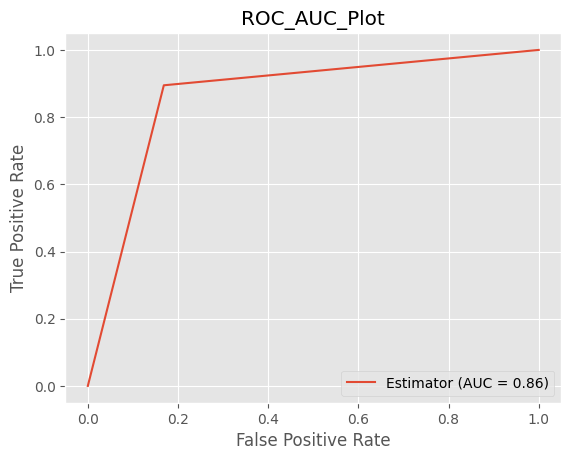

In [404]:
model(logreg, enc_x_train, enc_x_test, enc_y_train, enc_y_test)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        89
           1       0.85      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



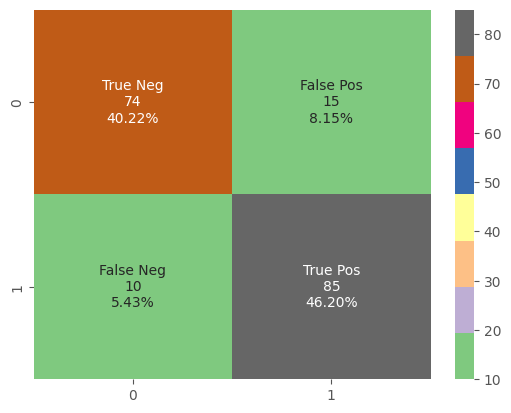

In [405]:
model_evaluation(logreg, enc_x_test, enc_y_test)

Q21: Is the Accuracy better than a single feature? (1m)

Ans:

Yes, at 86.41%, the multi-feature accuracy is significantly better than the best feature, `ST_Slope` at ~75.54%.

Q22: Apply scaler with all the features that you selected in the previous step on both train and testing data.  (2m)

In [406]:
# please type your code here
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # Standardization

df_scaled = df_encoded.copy()

df_scaled['Age'] = ss.fit_transform(df_scaled[['Age']])
df_scaled['RestingBP'] = ss.fit_transform(df_scaled[['RestingBP']])
df_scaled['Cholesterol'] = ss.fit_transform(df_scaled[['Cholesterol']])
df_scaled['MaxHR'] = ss.fit_transform(df_scaled[['MaxHR']])

df_scaled.head().T

,0,1,2,3,4
Age,-1.433140,-0.478484,-1.751359,-0.584556,0.051881
Sex,1.000000,0.000000,1.000000,0.000000,1.000000
ChestPainType,1.000000,2.000000,1.000000,0.000000,2.000000
RestingBP,0.410909,1.491752,-0.129513,0.302825,0.951331
Cholesterol,0.825070,-0.171961,0.770188,0.139040,-0.034755
FastingBS,0.000000,0.000000,0.000000,0.000000,0.000000
RestingECG,1.000000,1.000000,2.000000,1.000000,1.000000
MaxHR,1.382928,0.754157,-1.525138,-1.132156,-0.581981
ExerciseAngina,0.000000,0.000000,0.000000,1.000000,0.000000
Oldpeak,0.000000,1.000000,0.000000,1.500000,0.000000


Q23: Let train the logistic regression classifier with all the features that you selected in the previous step after scaling. (1m)

In [407]:
features = df_scaled[df_scaled.columns.drop(['HeartDisease','RestingBP','RestingECG'])]
target = df_scaled['HeartDisease']
sc_x_train, sc_x_test, sc_y_train, sc_y_test = ms.train_test_split(features, target, test_size = 0.20, random_state = 2)

Accuracy :  86.96%
Cross Validation Score :  91.13%
ROC_AUC Score :  86.87%


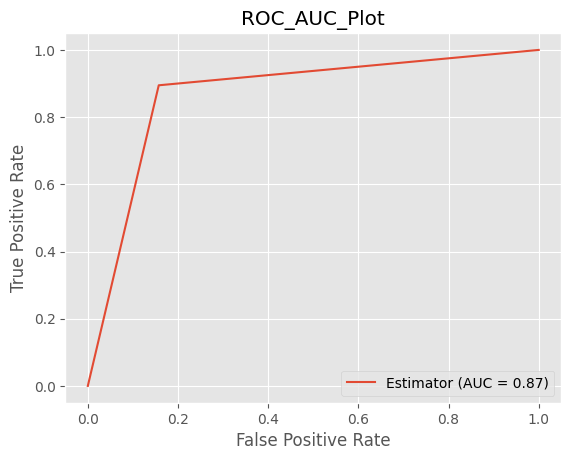

In [408]:
model(logreg, sc_x_train, sc_x_test, sc_y_train, sc_y_test)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        89
           1       0.86      0.89      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



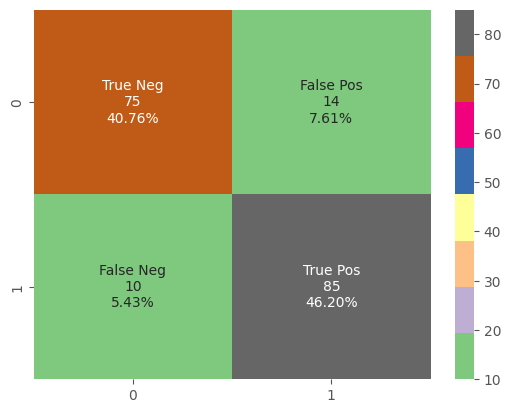

In [409]:
model_evaluation(logreg, sc_x_test, sc_y_test)

Q24: Is the Accuracy better after data scaling? Provide your justification. (1m)

Ans:
Yes, accuracy improved from 86.41% to 86.96% (0.6% increase) after scaling. The accuracy can be better after scaling due to the effect of feature magnitudes on the model's optimization process.

When performing logistic regression, the algorithm tries to find the optimal coefficients that maximize the likelihood of the observed data. The optimization process typically involves gradient-based methods, such as gradient descent, which aim to minimize the loss function.

Scaling can help avoid numerical instability since it reduces large differences in feature magnitudes. Without scaling, features with larger magnitudes may dominate the optimization process and have a disproportionate influence on the model's coefficients. Scaling ensures that all features contribute more equally, preventing bias towards any specific feature.


## K-NN

Q25: Apply KNN with all the features that you selected (without scaler) in the previous step. (1m)

Accuracy :  73.37%
Cross Validation Score :  77.92%
ROC_AUC Score :  73.18%


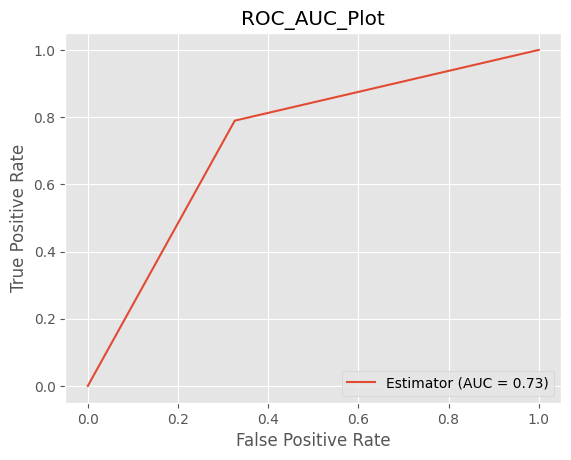

In [410]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(knn, enc_x_train, enc_x_test, enc_y_train, enc_y_test)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        89
           1       0.72      0.79      0.75        95

    accuracy                           0.73       184
   macro avg       0.74      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184



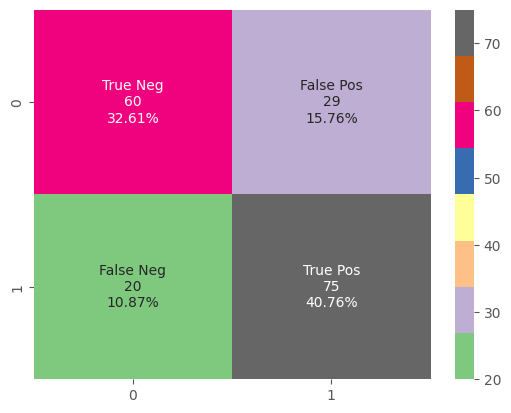

In [411]:
model_evaluation(knn, enc_x_test, enc_y_test)

Q26: Apply KNN with all the features that you selected (with scaler) in the previous step. (1m)

Accuracy :  80.43%
Cross Validation Score :  89.19%
ROC_AUC Score :  80.20%


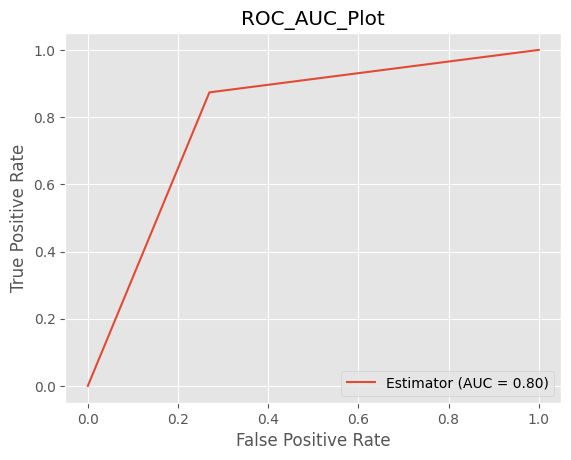

In [412]:
model(knn, sc_x_train, sc_x_test, sc_y_train, sc_y_test)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        89
           1       0.78      0.87      0.82        95

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



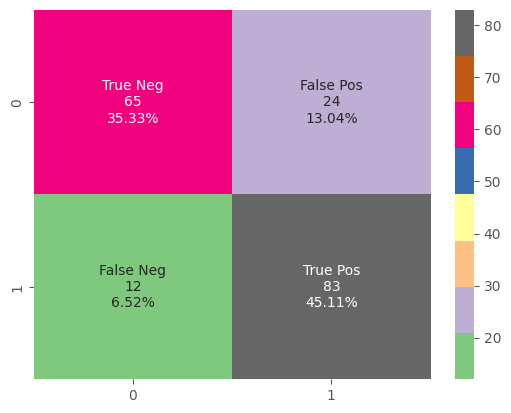

In [413]:
model_evaluation(knn, sc_x_test, sc_y_test)

Q27: KNN: Is the Accuracy better after data scaling? Provide your justification. (1m)

Ans:
Yes, accuracy improved from 73.37% to 80.43%. The accuracy improves after scaling the data due to the influence of the distance metric used in KNN.

KNN makes predictions based on the proximity of neighboring data points in the feature space. The choice of distance metric, such as Euclidean distance or Manhattan distance, heavily affects the algorithm's performance. When the features have different scales or units, it can lead to certain features dominating the distance calculations and potentially biasing the results.

By scaling the data, we normalize the features to a common scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. This process eliminates the discrepancies in scales and ensures that each feature contributes equally to the distance calculations.

When the features are properly scaled, KNN can make more accurate predictions. It can take into account the relative importance of each feature without being biased by differences in their scales. Consequently, scaling the data can help improve the accuracy of KNN.

## Hyperparameter Optimization

Q28: Let's try to do a grid search of the Knn from nearest neighbour 1 to 20. (1m)

In [414]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(sc_x_train, sc_y_train)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print("Best Parameter: ", best_k)
print("Best Score: ", round(best_score * 100,2))

Best Parameter:  19
Best Score:  85.97


Q29: Which is the best k? What is the accuracy? (1m) Please use this k number for the testing set later.

Ans:

Best `K` is 19, at an accuracy of 85.97%.

## Model Evaluation on Test Set

We need to first normalize our test set similar to how we scaled our training set.

In [415]:
from sklearn.preprocessing import MinMaxScaler

df_normalized = df_scaled.copy(deep = True)
mms = MinMaxScaler()
df_normalized['Oldpeak'] = mms.fit_transform(df_normalized[['Oldpeak']])

df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,-1.083616e-16,1.000545,-2.706015,-0.690629,0.051881,0.688318,2.491558
Sex,918.0,7.897603e-01,0.407701,0.000000,1.000000,1.000000,1.000000,1.000000
ChestPainType,918.0,7.810458e-01,0.956519,0.000000,0.000000,0.000000,2.000000,3.000000
RestingBP,918.0,1.954380e-16,1.000545,-7.154995,-0.669935,-0.129513,0.410909,3.653439
Cholesterol,918.0,0.000000e+00,1.000545,-1.818435,-0.233704,0.221363,0.623835,3.697252
FastingBS,918.0,2.331155e-01,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
RestingECG,918.0,9.891068e-01,0.631671,0.000000,1.000000,1.000000,1.000000,2.000000
MaxHR,918.0,4.953675e-16,1.000545,-3.018469,-0.660578,0.046790,0.754157,2.561874
ExerciseAngina,918.0,4.041394e-01,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.0,3.962913e-01,0.121201,0.000000,0.295455,0.363636,0.465909,1.000000


In [416]:
features = df_normalized[df_normalized.columns.drop(['HeartDisease','RestingBP','RestingECG'])]
target = df_normalized['HeartDisease']
norm_x_train, norm_x_test, norm_y_train, norm_y_test = ms.train_test_split(features, target, test_size = 0.20, random_state = 2)

Q30: Logistic Regression: Let test the accuracy on the testing set. (1m)

Accuracy :  87.50%
Cross Validation Score :  91.12%
ROC_AUC Score :  87.43%


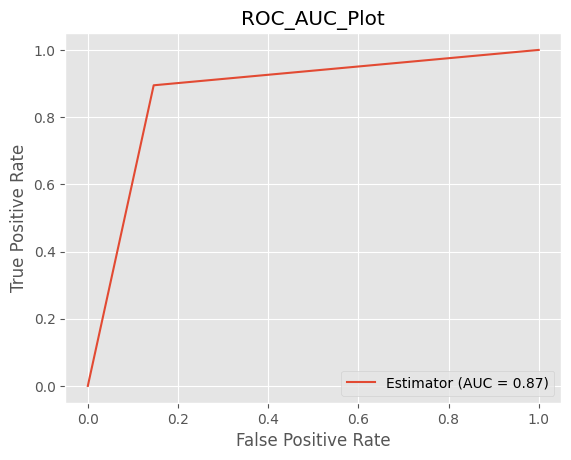

In [417]:
model(logreg, norm_x_train, norm_x_test, norm_y_train, norm_y_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



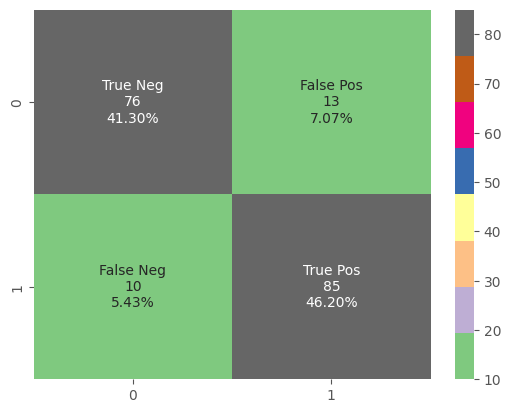

In [418]:
model_evaluation(logreg, norm_x_test, norm_y_test)

Q31: KNN: Let test the accuracy on the testing set. (1m)

Accuracy :  85.87%
Cross Validation Score :  92.27%
ROC_AUC Score :  85.68%


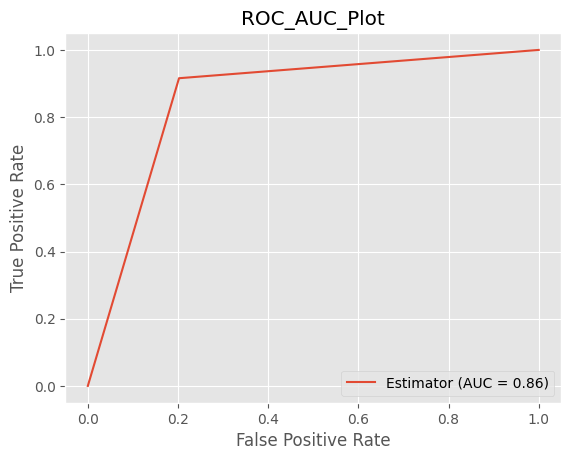

In [419]:
best_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = best_k,p = 1)
model(best_knn, norm_x_train, norm_x_test, norm_y_train, norm_y_test)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        89
           1       0.83      0.92      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



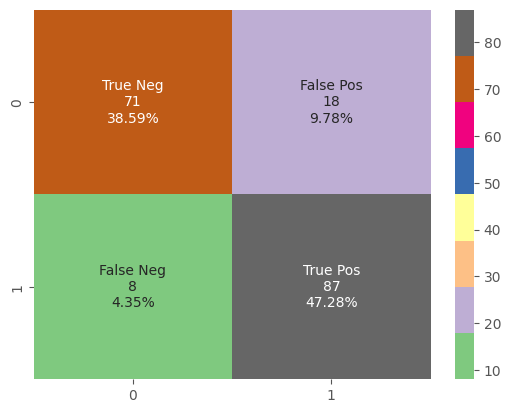

In [420]:
model_evaluation(best_knn, norm_x_test, norm_y_test)

Q32: Which model is better? Logistic Regression or Knn? (1m)

Ans:
Logistic Regression is a better model for this situation.

Q33: Compare the training and testing result. Why the result is different? Which one is higher. Provide the justification. (1m)
You might include the necessary coding for your justification.

In [421]:
logreg.fit(norm_x_train, norm_y_train)
y_train_pred_logreg = logreg.predict(norm_x_train)
y_test_pred_logreg = logreg.predict(norm_x_test)
train_accuracy_logreg = mt.accuracy_score(norm_y_train, y_train_pred_logreg)
test_accuracy_logreg = mt.accuracy_score(norm_y_test, y_test_pred_logreg)
print("Training Accuracy - Logistic Regression:", round(train_accuracy_logreg * 100,2))
print("Testing Accuracy - Logistic Regression:", round(test_accuracy_logreg * 100,2))

best_knn.fit(norm_x_train, norm_y_train)
y_train_pred_knn = best_knn.predict(norm_x_train)
y_test_pred_knn = best_knn.predict(norm_x_test)
train_accuracy_knn = mt.accuracy_score(norm_y_train, y_train_pred_knn)
test_accuracy_knn = mt.accuracy_score(norm_y_test, y_test_pred_knn)
print("Training Accuracy - KNN:", round(train_accuracy_knn * 100, 2))
print("Testing Accuracy - KNN:", round(test_accuracy_knn * 100, 2))

Training Accuracy - Logistic Regression: 85.97
Testing Accuracy - Logistic Regression: 87.5
Training Accuracy - KNN: 87.06
Testing Accuracy - KNN: 85.87


Ans:  

The test accuracy for Logistic Regression is higher, while the train accuracy for KNN is higher.

This suggests that the Logistic Regression model is likely to generalize well to unseen data, i.e. test data. This outcome can occur when the model is not overfitting and successfully captures the underlying patterns in the data, resulting in accurate predictions on new, unseen examples. Since Logistic regression is a parametric model that assumes a linear relationship between the features and the log-odds of the target variable, if the underlying relationship in the test data is indeed linear, the model can perform well and achieve higher accuracy on the test set.

On the other hand, when the train accuracy for KNN is higher than the test accuracy, it indicates that the KNN model might be overfitting the training data. KNN is a non-parametric model that relies on the proximity of training examples to make predictions for new instances.
With a larger value of k (i.e. `19`), the KNN model considers a greater number of neighbors when making predictions. This can help in reducing the impact of noise and outliers in the training data. However, if the value of k is too large relative to the dataset size or the complexity of the problem, the model may lose its ability to capture local patterns effectively and might struggle to generalize to unseen examples.

When the training accuracy is higher than the test accuracy for the KNN model with a k value of 19, it suggests that the model might be overly influenced by the specific characteristics and noise in the training data. It may still struggle to generalize well to new, unseen data points.



# Summary
Q34: Could you give me a summary of your project? You may want to include which features being selected, model, result and etc. (1m)

Ans:

Given the dataset, I selected the features based on `ChiSquared` (for categorical values) and `ANOVA F-score` (for numerical values). This resulted in dropping two columns (`RestingBP` and `RestingECG`), which does not contribute importantly to the dataet.

Independently, I found that `ST_Slope` has the highest individual feature accuracy, yet it cannot be matched by running the models on the selected feature set. I ran the `Logistic Regression` and `K-Nearest Neighbours` (also selecting the Best K) on the encoded, then scaled, and then normalized dataset.

`Logistic Regression` stands out as the better model thus far.

# Further improvement
Q:35 Is there any steps that we could do to further improve the result? (1m)

Ans:

1. Feature engineering: Analyze and preprocess the features to identify relevant patterns or reduce noise in the data. This can involve techniques like feature scaling, dimensionality reduction, or creating new features. Of concern is the distribution of `Males` and `Females`, which we would need to balance and normalize.

2. Explore other Models: Test out other models to find and optimize the best model for this problem. Examples are:
   
    *   Decision Trees: Simple and interpretable models that capture non-linear relationships in the data but can overfit.

    *   Random Forest: Ensemble of decision trees that reduces overfitting and provides feature importance rankings.

    *   Support Vector Machines (SVM): Finds an optimal hyperplane to separate data points of different classes, works well in high-dimensional spaces.

    *   Neural Networks: Deep learning models that learn complex patterns and relationships, perform well in various domains but require more data and computational resources.

3. Hyperparameter tuning: Explore different hyperparameters of the different models, to find the optimal configuration that yields better generalization.

4. Cross-validation: Perform cross-validation to get a more robust estimate of the model's performance. This can help identify whether the observed overfitting is consistent across different folds of the data and guide the selection of hyperparameters.